---

# Topic Modeling (Prepare)

On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophisticated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifying common themes in customer reviews
* Discovering the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* Part 0: Warm-Up
* Part 1: Describe how an LDA Model works
* Part 2: Estimate a LDA Model with Gensim
* Part 3: Interpret LDA results & Select the appropriate number of topics

# Part 0: Warm-Up
How do we do a grid search? 

In [ ]:
!pip install -U pandas-profiling
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.7/dist-packages (3.0.0)


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

# pd.reset_option('^display.', silent=True)

In [ ]:
# Dataset
# categories = ['sci.electronics',
#               'rec.sport.baseball',
#               'rec.sport.hockey']

# Load training data
newsgroups_train = fetch_20newsgroups(subset='train', 
                                      remove=('headers', 'footers', 'quotes'))

# Load testing data
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'))

print(f'Training Samples: {len(newsgroups_train.data)}')
print(f'Testing Samples: {len(newsgroups_test.data)}')

Training Samples: 11314
Testing Samples: 7532


In [ ]:
newsgroups_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
newsgroups_train['data'][0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

### GridSearch on Just Classifier
* Fit the vectorizer and prepare BEFORE it goes into the gridsearch

In [ ]:
# create tfidf instant

# transform data

# create parameter dict

# create model instance 

# instantiate a grid search object

# optimize model parameters
vect1 = TfidfVectorizer( )
X_train = vect1.fit_transform(newsgroups_train['data'])
print(X_train.shape)

(11314, 101631)


In [ ]:
dir(newsgroups_train)

['DESCR', 'data', 'filenames', 'target', 'target_names']

In [ ]:
y = newsgroups_train['target']
y.shape

(11314,)

In [ ]:
p1 = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10]
}

clf = RandomForestClassifier()
gs1 = GridSearchCV(clf, p1, cv=5, n_jobs=-1, verbose=1)
gs1.fit(X_train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
gs1.best_params_

{'max_depth': None, 'n_estimators': 50}

In [ ]:
gs1.best_score_

0.6124274600861981

In [ ]:
# create and tranform a sample text 
sample_vec = vect1.transform(['The yankees are the best team in baseball'])
print(sample_vec.shape)

# use the model to classify the sample text 
gs1.predict(sample_vec)

(1, 101631)


array([9])

In [ ]:
newsgroups_train['target_names'][9]

'rec.sport.baseball'

### GridSearch with BOTH the Vectoizer & Classifier

In [ ]:
from sklearn.pipeline import Pipeline

# create tfidf instance

# create model instance 

# Create a pipline instance using tfidf and your model 

# create parameter dict

# instantiate a grid search object

# optimize model parameters

pipeline = Pipeline([
    ('vect', vect1),
    ('clf', clf)
])

p2 = {
    'vect__stop_words': (None, 'english'),
    'vect__min_df': (2, 5),
    'clf__max_depth': (20, None)
}

gs2 = GridSearchCV(pipeline, p2, cv=5, n_jobs=-1, verbose=1)
gs2.fit(newsgroups_train['data'], newsgroups_train['target'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  6.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [ ]:
gs2.best_params_

{'clf__max_depth': None, 'vect__min_df': 2, 'vect__stop_words': 'english'}

In [ ]:
gs2.best_score_

0.6560896800996151

In [ ]:
# pass a raw text sample into the optimized model in order to classify it
gs2.predict(['The yankees are the best team in baseball'])

array([9])

Advantages to using GS with the Pipe:
* Allows us to make predictions on raw text increasing reproducibility. :)
* Allows us to tune the parameters of the vectorizer along side the classifier. :D 

# Part 1: Describe how an LDA Model works

[Your Guide to Latent Dirichlet Allocation](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

[LDA Topic Modeling](https://lettier.com/projects/lda-topic-modeling/)

[Topic Modeling with Gensim](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [ ]:
# Download spacy model
import spacy.cli
spacy.cli.download("en_core_web_md")

!pip install pyLDAvis
# !pip install pyLDAvis.gensim
import pyLDAvis
# import pyLDAvis.gensim 

import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy


import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer



✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [ ]:
# Load training data
newsgroups_train = fetch_20newsgroups(subset='train', 
                                      remove=('headers', 'footers', 'quotes'))

# Load testing data
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     remove=('headers', 'footers', 'quotes'))

df = pd.DataFrame({
    'content': newsgroups_train['data'],
    'target': newsgroups_train['target'],
    'target_names': [newsgroups_train['target_names'][i] for i in newsgroups_train['target']]
})
print(df.shape)
df.head()

(11314, 3)


,content,target,target_names
0,I was wondering if anyone out there could enli...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,\nDo you have Weitek's address/phone number? ...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space


In [ ]:
pd.set_option('display.max_colwidth', 300)

df.sample(5)

,content,target,target_names
5198,"\nThere is no easy answer to this question: it depends on whether the display\ndevice can hold pixmaps in off-screen memory, and if so, how efficiently\nthe server manages these resources (having to deal with limited off-screen\nmemory is the bane of the server implementor's existence!). \n\nI ...",5,comp.windows.x
7622,"try comp.dcom - I was reading a thread a while back about an 800 number\nthat you could dial. worked here. It was a sales line for sprint I think\ntelling you that you could have all your customers numbers using there\nANI, then it told you your number. Should work with any modern switch.\n\...",12,sci.electronics
6425,"Hi, can anyone direct me to map type gifs? \n\nI am interesting in cartography and would find\nthese gifs useful.\n\ntia,\n",1,comp.graphics
1623,"\n[stuff deleted]\n\nOk, here's the solution to your problem. Move to Canada. Yesterday I was able\nto watch FOUR games...the NJ-PITT at 1:00 on ABC, LA-CAL at 3:00 (CBC), \nBUFF-BOS at 7:00 (TSN and FOX), and MON-QUE at 7:30 (CBC). I think that if\neach series goes its max I could be watchin...",10,rec.sport.hockey
3400,\n\nScience does not progress via experimentation but by philosophising. One\naim of experiments is to investigate the validity of the hyptheses\nresulting from the models produced by this thinking process.\n\n\nScience has one advantage of all other approaches to explaining the world.\nIt is o...,15,soc.religion.christian


In [ ]:
# pd.reset_option('display.max_colwidth', silent=True)
# pd.get_option("display.max_colwidth")

In [ ]:
# can visit (https://regex101.com/) for a regex python editor (has cheat sheets)

# 1. Remove new line characters
df['clean_text'] = df['content'].apply(lambda x: re.sub('\s+', ' ', x))

# 2. Remove Emails
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('From: \S+@\S+', '', x))

# 3. Remove non-alphanumeric characters
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x))

# 4. Remove extra whitespace and lowercase text
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x.lower().split()))

<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \S
<input>:4: DeprecationWarning: invalid escape sequence \s
<input>:7: DeprecationWarning: invalid escape sequence \S
<ipython-input

In [ ]:
df.head()

,content,target,target_names,clean_text
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \...",7,rec.autos,i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyo...
1,"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy...",4,comp.sys.mac.hardware,a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk func...
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\ni'm looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopef...",4,comp.sys.mac.hardware,well folks my mac plus finally gave up the ghost this weekend after starting life as a k way back in sooo i m in the market for a new machine a bit sooner than i intended to be i m looking into picking up a powerbook or maybe and have a bunch of questions that hopefully somebody can answer does ...
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n,1,comp.graphics,do you have weitek s address phone number i d like to get some information about this chip
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - things are checked\nthat don't have the right values in yet because they aren't\nset till after launch,...",14,sci.space,from article c owcb n p world std com by tombaker world std com tom a baker my understanding is that the expected errors are basically known bugs in the warning system software things are checked that don t have the right values in yet because they aren t set till after launch and suchlike rathe...


In [ ]:
# Leverage tqdm for progress_apply
from tqdm import tqdm
tqdm.pandas()

# If you're on macOS, Linux, or python session executed from Windows Subsystem for Linux (WSL)
# conda activate U4-S1-NLP
# pip install pandarallel
#
# from pandarallel import pandarallel
# pandarallel.initialize(progress_bar=True)
#
# df['lemmas'] = df['content'].parallel_apply(get_lemmas)
#
# Ref: https://github.com/nalepae/pandarallel

In [ ]:
nlp = spacy.load("en_core_web_md", disable=['parser', 'tagger', 'ner'])

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


In [ ]:
# create our tokens in the form of lemmas 
%%time
df['lemmas'] = df['clean_text'].progress_apply(lambda x: [token.lemma_ for token in nlp(x) if (token.is_stop != True) and (token.is_punct != True) and (len(token) > 2)])

Streaming output truncated to the last 5000 lines.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
 89%|████████▉ | 10067/11314 [12:57<01:34, 13.16it/s]/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILAB

CPU times: user 13min 50s, sys: 18.7 s, total: 14min 9s
Wall time: 14min 34s


In [ ]:
df.head()

,content,target,target_names,clean_text,lemmas
0,"I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \...",7,rec.autos,i was wondering if anyone out there could enlighten me on this car i saw the other day it was a door sports car looked to be from the late s early s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyo...,"[wonder, enlighten, car, see, day, door, sport, car, look, late, early, call, bricklin, door, small, addition, bumper, separate, rest, body, know, tellme, model, engine, spec, year, production, car, history, info, funky, look, car, mail]"
1,"A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy...",4,comp.sys.mac.hardware,a fair number of brave souls who upgraded their si clock oscillator have shared their experiences for this poll please send a brief message detailing your experiences with the procedure top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk func...,"[fair, numb, brave, soul, upgrade, clock, oscillator, share, experience, poll, send, brief, message, detail, experience, procedure, speed, attain, cpu, rate, speed, add, card, adapter, heat, sink, hour, usage, day, floppy, disk, functionality, floppy, especially, request, summarize, day, add, ne..."
2,"well folks, my mac plus finally gave up the ghost this weekend after\nstarting life as a 512k way back in 1985. sooo, i'm in the market for a\nnew machine a bit sooner than i intended to be...\n\ni'm looking into picking up a powerbook 160 or maybe 180 and have a bunch\nof questions that (hopef...",4,comp.sys.mac.hardware,well folks my mac plus finally gave up the ghost this weekend after starting life as a k way back in sooo i m in the market for a new machine a bit sooner than i intended to be i m looking into picking up a powerbook or maybe and have a bunch of questions that hopefully somebody can answer does ...,"[folk, mac, plus, finally, give, ghost, weekend, start, life, way, sooo, market, new, machine, bite, soon, intend, look, pick, powerbook, maybe, bunch, question, hopefully, somebody, answer, anybody, know, dirt, round, powerbook, introduction, expect, hear, suppose, appearence, summer, haven, he..."
3,\nDo you have Weitek's address/phone number? I'd like to get some information\nabout this chip.\n,1,comp.graphics,do you have weitek s address phone number i d like to get some information about this chip,"[weitek, address, phone, numb, like, information, chip]"
4,"From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n\n\nMy understanding is that the 'expected errors' are basically\nknown bugs in the warning system software - things are checked\nthat don't have the right values in yet because they aren't\nset till after launch,...",14,sci.space,from article c owcb n p world std com by tombaker world std com tom a baker my understanding is that the expected errors are basically known bugs in the warning system software things are checked that don t have the right values in yet because they aren t set till after launch and suchlike rathe...,"[article, owcb, world, std, com, tombaker, world, std, com, tom, baker, understand, expect, error, basically, know, bug, warn, system, software, thing, check, don, right, value, aren, set, till, launch, suchlike, fix, code, possibly, introduce, new, bug, tell, crow, warn, liftoff, ignore]"


### The two main inputs to the LDA topic model are the dictionary (id2word) and the corpus.

In [ ]:
# Create Dictionary

# Term Document Frequency

# stores (token id, token count) for each doc in the corpus

id2word = corpora.Dictionary(df['lemmas'])
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

In [ ]:
# How many words are in our vocab?
len(id2word.keys())

61160

In [ ]:
# Let's remove extreme values
id2word.filter_extremes(no_below=3, no_above=0.2)

In [ ]:
# How many words are in our vocab?
len(id2word.keys())

18027

In [ ]:
# Re-create DTM with new dictionary of vocab
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

In [ ]:
id2word[200]

'destruction'

In [ ]:
df.lemmas.iloc[5]

['course',
 'term',
 'rigidly',
 'define',
 'bill',
 'doubt',
 'use',
 'term',
 'quote',
 'allegedly',
 'read',
 'article',
 'present',
 'argument',
 'weapon',
 'mass',
 'destruction',
 'commonly',
 'understand',
 'switch',
 'topic',
 'point',
 'evidently',
 'weapon',
 'allow',
 'late',
 'analysis',
 'give',
 'understand',
 'consider',
 'class']

In [ ]:
corpus[5]

[(13, 1),
 (92, 1),
 (127, 1),
 (148, 1),
 (162, 1),
 (186, 2),
 (190, 1),
 (191, 1),
 (192, 1),
 (193, 1),
 (194, 1),
 (195, 1),
 (196, 1),
 (197, 1),
 (198, 1),
 (199, 1),
 (200, 1),
 (201, 1),
 (202, 1),
 (203, 1),
 (204, 1),
 (205, 1),
 (206, 1),
 (207, 1),
 (208, 2),
 (209, 1),
 (210, 2)]

In [ ]:
# Human readable format of corpus (term-frequency)
[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]

[('late', 1),
 ('give', 1),
 ('read', 1),
 ('use', 1),
 ('article', 1),
 ('understand', 2),
 ('allegedly', 1),
 ('allow', 1),
 ('analysis', 1),
 ('argument', 1),
 ('bill', 1),
 ('class', 1),
 ('commonly', 1),
 ('consider', 1),
 ('course', 1),
 ('define', 1),
 ('destruction', 1),
 ('doubt', 1),
 ('evidently', 1),
 ('mass', 1),
 ('point', 1),
 ('present', 1),
 ('quote', 1),
 ('switch', 1),
 ('term', 2),
 ('topic', 1),
 ('weapon', 2)]

# Part 2: Estimate a LDA Model with Gensim

 ### Train an LDA model

In [ ]:
### This cell runs the single-processor version of the model (slower)
# %%time
# lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
#                                            id2word=id2word,
#                                            num_topics=20, 
#                                            chunksize=100,
#                                            passes=10,
#                                            per_word_topics=True)
# lda_model.save('lda_model.model')
# # https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
%%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=20, 
                                                        chunksize=100, #number of documents to consider at once (affects the memory consumption)
                                                        passes=10,  #how many times the algorithm is supposed to pass over the whole corpus
                                                        per_word_topics=True,
                                                        workers=12)


lda_multicore.save('lda_multicore.model')
# https://radimrehurek.com/gensim/models/ldamulticore.html

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

CPU times: user 43.5 s, sys: 4.69 s, total: 48.1 s
Wall time: 1min 32s


/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
from gensim import models
lda_multicore =  models.LdaModel.load('lda_multicore.model')

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


### View the topics in LDA model

In [ ]:
df.target_names.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: target_names, dtype: int64

In [ ]:
# display the print_topics from the model 
pprint(lda_multicore.print_topics())

[(0,
  '0.010*"disease" + 0.010*"patient" + 0.010*"medical" + 0.009*"new" + '
  '0.007*"april" + 0.007*"good" + 0.007*"year" + 0.007*"doctor" + '
  '0.006*"cause" + 0.006*"health"'),
 (1,
  '0.009*"msg" + 0.009*"pitch" + 0.009*"run" + 0.008*"hit" + 0.008*"good" + '
  '0.007*"dos" + 0.007*"food" + 0.007*"cub" + 0.007*"well" + 0.006*"year"'),
 (2,
  '0.008*"bite" + 0.008*"right" + 0.008*"converter" + 0.008*"random" + '
  '0.007*"mov" + 0.006*"byte" + 0.006*"bit" + 0.006*"book" + 0.006*"egg" + '
  '0.006*"iran"'),
 (3,
  '0.019*"go" + 0.018*"say" + 0.013*"come" + 0.011*"time" + 0.010*"tell" + '
  '0.010*"people" + 0.009*"get" + 0.009*"didn" + 0.008*"see" + 0.008*"look"'),
 (4,
  '0.013*"people" + 0.009*"right" + 0.007*"thing" + 0.007*"want" + 0.006*"go" '
  '+ 0.006*"post" + 0.006*"wrong" + 0.006*"happen" + 0.005*"say" + '
  '0.005*"government"'),
 (5,
  '0.029*"key" + 0.012*"chip" + 0.011*"president" + 0.010*"encryption" + '
  '0.008*"use" + 0.008*"government" + 0.008*"clipper" + 0.008*"

# Part 3: Interpret LDA results & Select the appropriate number of topics

In [ ]:
import pyLDAvis.gensim_models as gensimvis  # updated march 25

In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_multicore, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.105202  0.073740       1        1  12.702842
19    -0.039819 -0.214542       2        1   9.610962
17    -0.098759  0.051211       3        1   9.381618
8      0.045181 -0.178071       4        1   7.530842
3     -0.107175  0.142650       5        1   7.077589
5     -0.074132 -0.053339       6        1   5.821160
4     -0.119022  0.094658       7        1   5.352866
12     0.030948  0.138658       8        1   5.229582
9      0.003972 -0.192156       9        1   5.093052
13    -0.068511 -0.064262      10        1   5.018933
14    -0.017757  0.140314      11        1   5.017503
7     -0.044805 -0.138680      12        1   4.032650
16    -0.024835 -0.061204      13        1   3.594977
6     -0.067174  0.001962      14        1   2.926978
0     -0.009684  0.073127      15        1   2.864807
10     0.333357 -0.107556      16        1   2.318017
1     -0.021511  0.081193      17        1   1.868663
18    -0.040710  0.020663      18        1   1.709621
2     -0.003928  0.049116      19        1   1.512880
15     0.429566  0.142519      20        1   1.334458, topic_info=       Term         Freq        Total Category  logprob  loglift
1612    max  4587.000000  4587.000000  Default  30.0000  30.0000
80      edu  2288.000000  2288.000000  Default  29.0000  29.0000
239   drive  1910.000000  1910.000000  Default  28.0000  28.0000
1124    god  2154.000000  2154.000000  Default  27.0000  27.0000
503     key  1652.000000  1652.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
3702    fyn    83.270218    96.811418  Topic20  -4.9721   4.1660
3690    fij    78.990848    95.918711  Topic20  -5.0249   4.1225
3673    chz    73.960796   236.553342  Topic20  -5.0907   3.1540
3796    rlk    64.137713   167.911448  Topic20  -5.2332   3.3542
455     air    70.184129   379.851981  Topic20  -5.1431   2.6280

[1405 rows x 6 columns], token_table=      Topic      Freq Term
term                      
348       1  0.094500    2
348       2  0.049500    2
348       3  0.157500    2
348       4  0.014625    2
348       5  0.086625    2
...     ...       ...  ...
1000     15  0.005529  yes
1000     16  0.025433  yes
1000     17  0.025433  yes
1000     18  0.014375  yes
1000     19  0.017692  yes

[5499 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 20, 18, 9, 4, 6, 5, 13, 10, 14, 15, 8, 17, 7, 1, 11, 2, 19, 3, 16])

### What is topic coherence?
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
%%time
start=2
limit=42
step=4
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemmas'], start=start, limit=limit, step=step)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

CPU times: user 9min 53s, sys: 47.8 s, total: 10min 41s
Wall time: 18min 30s


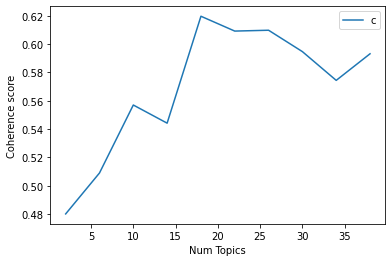

In [ ]:
# use these values for the plot if compute_coherence_values takes too long to run 
# coherence_values = [0.5054, 0.5332, 0.5452, 0.564, 0.5678, 0.5518, 0.519]


x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4802
Num Topics = 6  has Coherence Value of 0.5091
Num Topics = 10  has Coherence Value of 0.557
Num Topics = 14  has Coherence Value of 0.5442
Num Topics = 18  has Coherence Value of 0.6196
Num Topics = 22  has Coherence Value of 0.6092
Num Topics = 26  has Coherence Value of 0.6098
Num Topics = 30  has Coherence Value of 0.5947
Num Topics = 34  has Coherence Value of 0.5744
Num Topics = 38  has Coherence Value of 0.5932


In [ ]:
# Select the model and print the topics
optimal_model = model_list[np.where(np.array(x)==14)[0][0]]
# optimal_model =  models.LdaModel.load('optimal_model.model')
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.012*"edu" + 0.010*"window" + 0.008*"mail" + 0.008*"available" + '
  '0.007*"use" + 0.007*"file" + 0.007*"com" + 0.006*"list" + 0.006*"server" + '
  '0.006*"version"'),
 (1,
  '0.012*"year" + 0.008*"good" + 0.008*"well" + 0.008*"point" + 0.007*"win" + '
  '0.007*"time" + 0.005*"run" + 0.005*"science" + 0.005*"people" + '
  '0.005*"look"'),
 (2,
  '0.024*"edu" + 0.014*"game" + 0.011*"radio" + 0.009*"com" + 0.009*"dos" + '
  '0.008*"sale" + 0.008*"sell" + 0.007*"offer" + 0.007*"mark" + 0.007*"mail"'),
 (3,
  '0.019*"god" + 0.010*"people" + 0.008*"believe" + 0.008*"jesus" + '
  '0.007*"say" + 0.006*"mean" + 0.006*"bible" + 0.005*"question" + '
  '0.005*"religion" + 0.005*"thing"'),
 (4,
  '0.011*"year" + 0.008*"program" + 0.008*"state" + 0.007*"report" + '
  '0.007*"new" + 0.007*"use" + 0.006*"numb" + 0.006*"increase" + '
  '0.005*"safety" + 0.005*"health"'),
 (5,
  '0.020*"wire" + 0.016*"com" + 0.008*"port" + 0.008*"circuit" + '
  '0.008*"connect" + 0.008*"grind" + 0.007*"copy" 

In [ ]:
pprint(', '.join(df.lemmas.iloc[1]))
doc_lda = lda_multicore[corpus]
doc_lda[1][0]

('fair, numb, brave, soul, upgrade, clock, oscillator, share, experience, '
 'poll, send, brief, message, detail, experience, procedure, speed, attain, '
 'cpu, rate, speed, add, card, adapter, heat, sink, hour, usage, day, floppy, '
 'disk, functionality, floppy, especially, request, summarize, day, add, '
 'network, knowledge, base, clock, upgrade, haven, answer, poll, thank')


[(0, 0.15565352), (7, 0.59568244), (8, 0.23005913)]

# Appendix

### Bertopic 

In [ ]:
https://pypi.org/project/bertopic/
https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

SyntaxError: ignored

## LDA with Anchor

In [ ]:
!pip install corextopic
 
from corextopic import corextopic as ct
from corextopic import vis_topic as vt # jupyter notebooks will complain matplotlib is being loaded twice
 
vectorizer = vectorizer.fit(data)
tfidf = vectorizer.transform(data)
vocab = vectorizer.get_feature_names()

anchors = []
anchors = [
    [a for a in topic if a in vocab]
    for topic in anchors
]

model = ct.Corex(n_hidden=8, seed=42)
ss_ldamodel_Anchor = model.fit(
    tfidf,
    words=vocab,
    anchors=anchors, # Pass the anchors in here
    anchor_strength = 4 # Tell the model how much it should rely on the anchors
)